## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –í–ö–û

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [2]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.head(5)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [4]:
df_vko = df[df['–†–µ–≥–∏–æ–Ω'] == '–í–û–°–¢–û–ß–ù–û-–ö–ê–ó–ê–•–°–¢–ê–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_vko = df_vko.drop('–†–µ–≥–∏–æ–Ω', axis = 'columns')
df_vko.head()

–ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480  2015-01  4151.27    29.4        786783.0   -10.364516
481  2015-02  6473.64    33.4        860746.0    -9.839286
482  2015-03  6837.39    41.2        939284.0    -4.858065
483  2015-04  5875.35    50.6       1013296.0     6.830000
484  2015-05  5952.33    63.8       1046072.0    14.774194

In [5]:
df_vko = df_vko.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_vko.head()

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480  2015-01          4151.27    29.4        786783.0   -10.364516
481  2015-02          6473.64    33.4        860746.0    -9.839286
482  2015-03          6837.39    41.2        939284.0    -4.858065
483  2015-04          5875.35    50.6       1013296.0     6.830000
484  2015-05          5952.33    63.8       1046072.0    14.774194

In [6]:
df_vko['–ü–µ—Ä–∏–æ–¥'] = pd.to_datetime(df_vko['–ü–µ—Ä–∏–æ–¥'], format='%Y-%m')

In [7]:
df_vko.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 480 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   –ü–µ—Ä–∏–æ–¥           120 non-null    datetime64[ns]
 1   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64       
 2   –û—Å–∞–¥–∫–∏           120 non-null    float64       
 3   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64       
 4   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.6 KB


In [8]:
df_vko.isna().sum()

–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

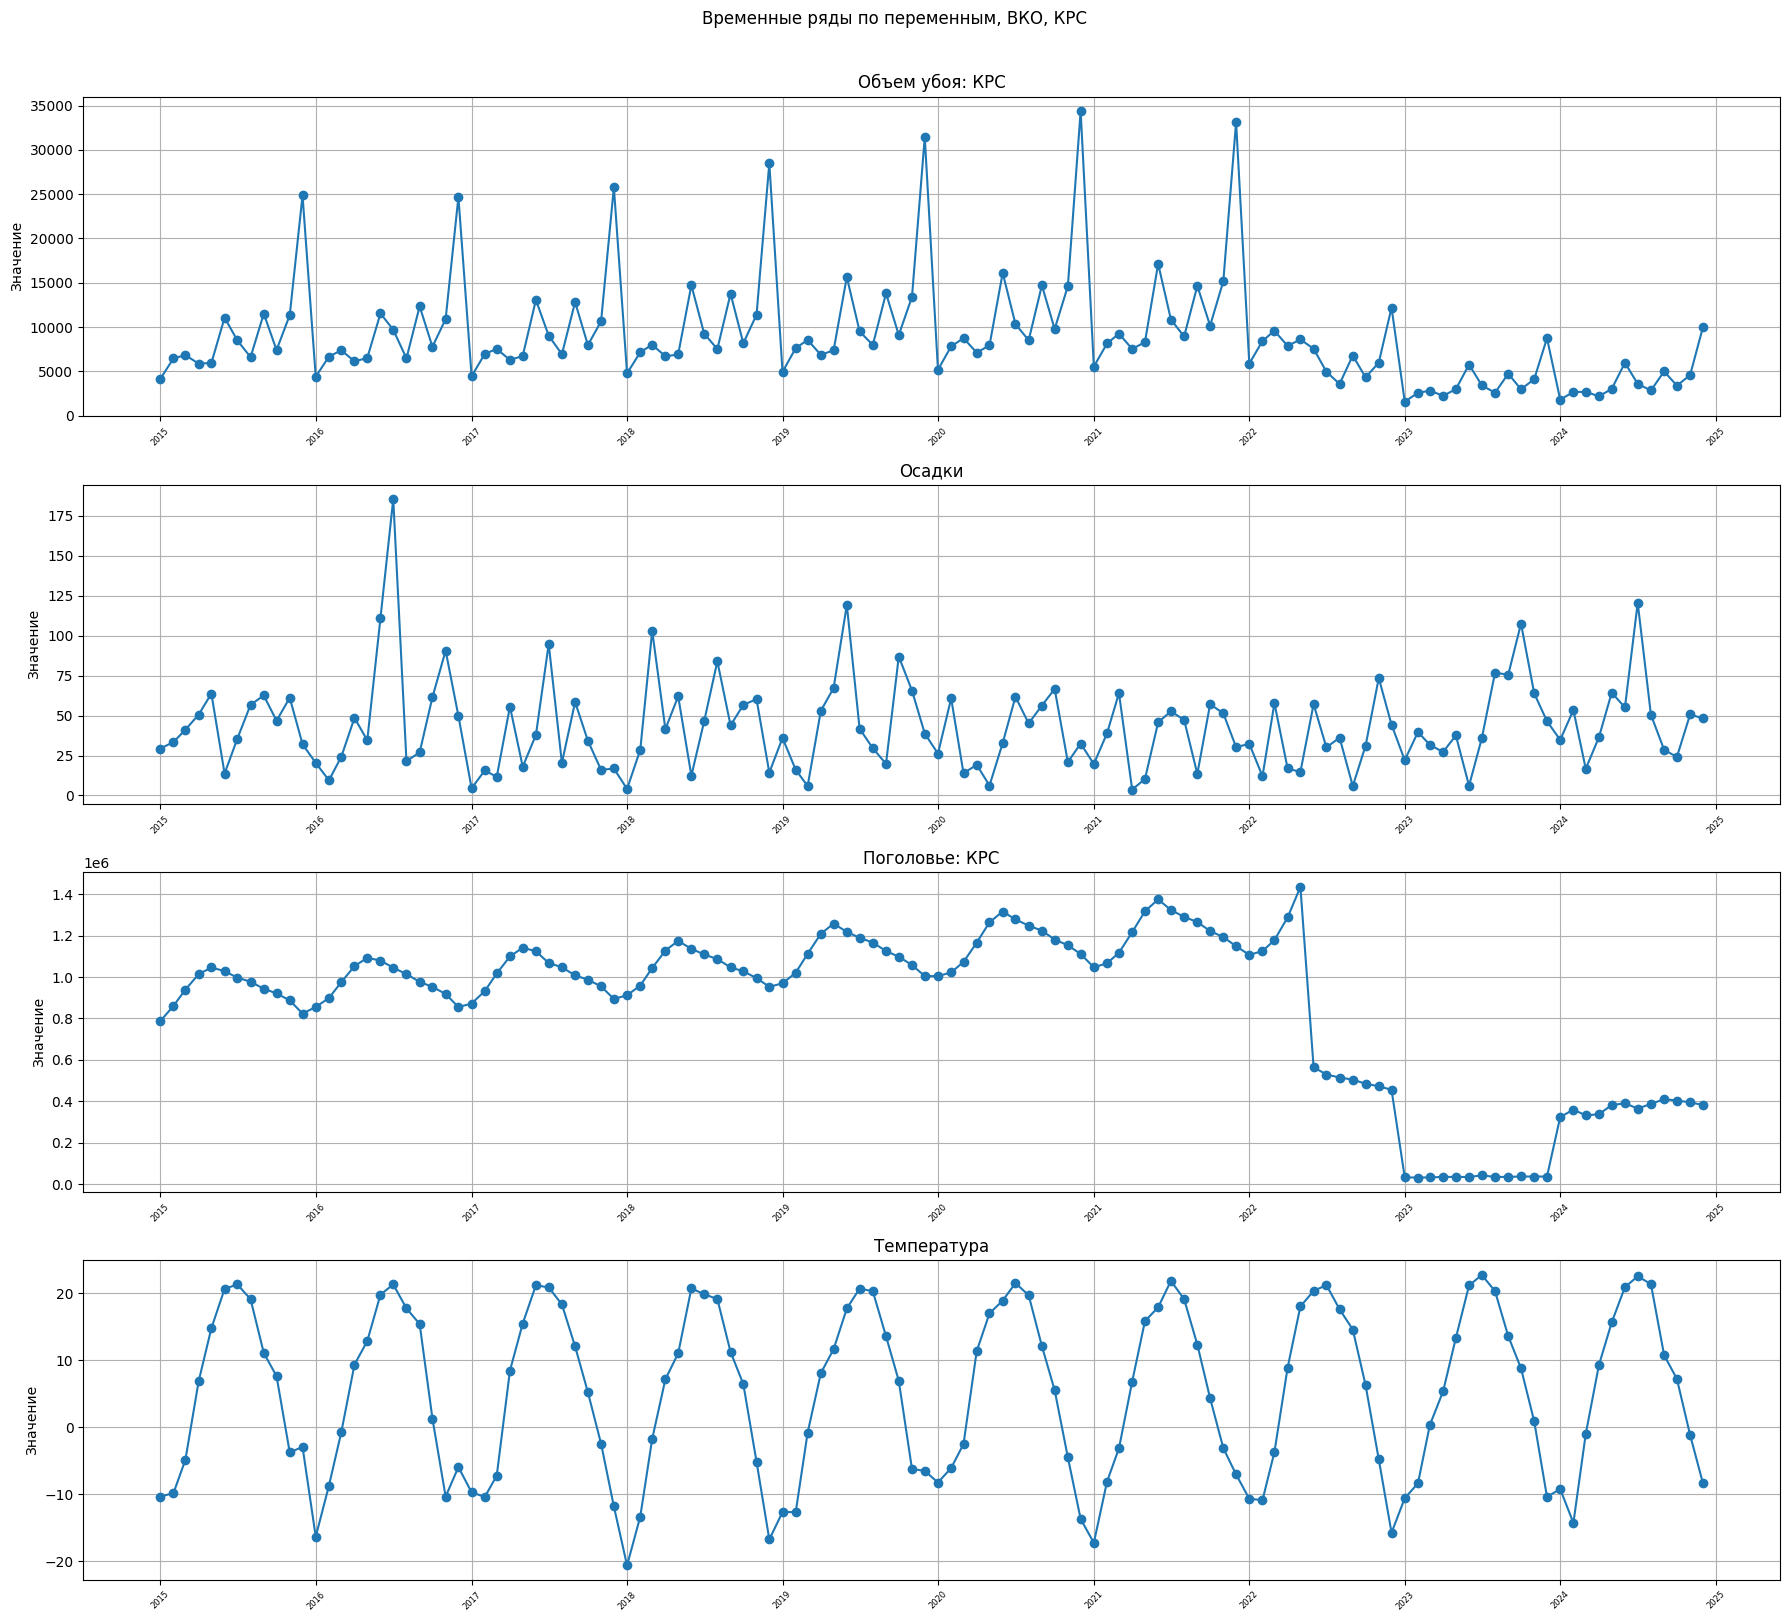

In [9]:
# Plot each variable in its own subplot
value_cols = [col for col in df_vko.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_vko["–ü–µ—Ä–∏–æ–¥"], df_vko[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –í–ö–û, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()


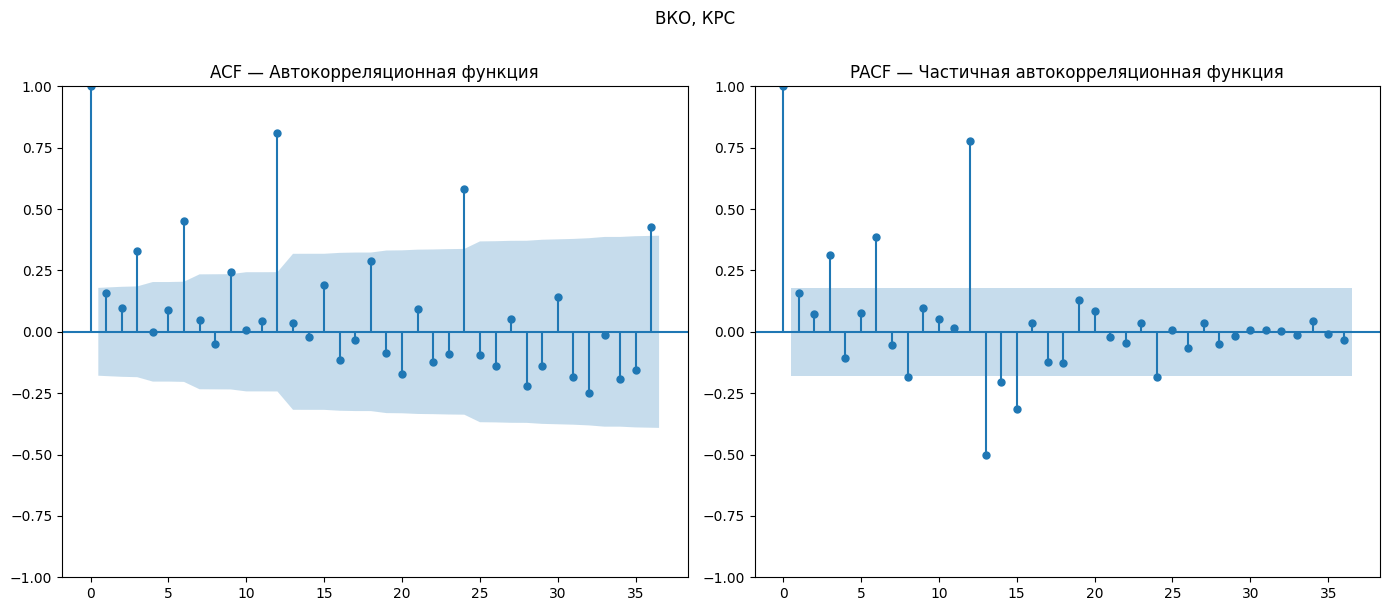

In [10]:
y = df_vko["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=36, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=36, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–í–ö–û, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24 –∏ +36 –º–µ—Å—è—Ü–µ–≤). 

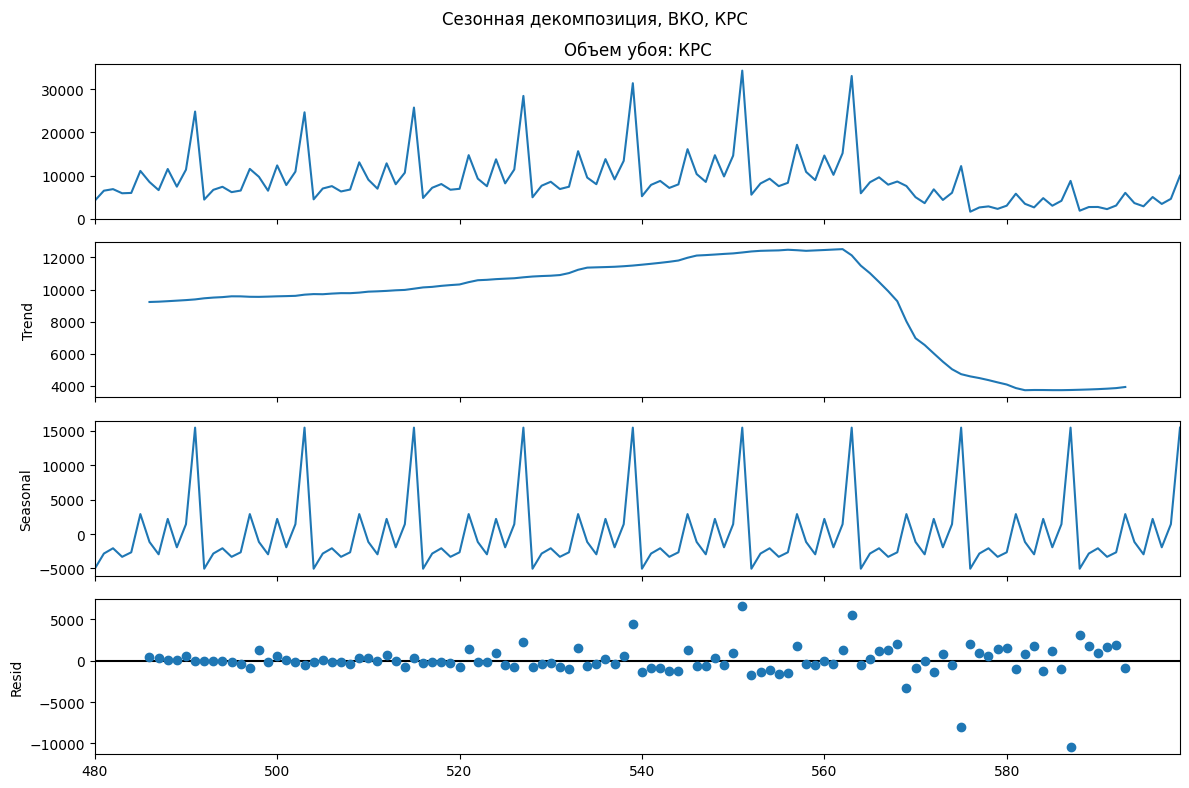

In [11]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_vko["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –í–ö–û, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [12]:
# Run ADF test
result = adfuller(df_vko["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -0.9433
p-value: 0.7734
Critical Value (1%): -3.4936
Critical Value (5%): -2.8892
Critical Value (10%): -2.5815
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

In [13]:
df_vko

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
480 2015-01-01          4151.27    29.4        786783.0   -10.364516
481 2015-02-01          6473.64    33.4        860746.0    -9.839286
482 2015-03-01          6837.39    41.2        939284.0    -4.858065
483 2015-04-01          5875.35    50.6       1013296.0     6.830000
484 2015-05-01          5952.33    63.8       1046072.0    14.774194
..         ...              ...     ...             ...          ...
595 2024-08-01          2845.28    50.6        387497.0    21.361290
596 2024-09-01          5000.88    28.6        410436.0    10.743333
597 2024-10-01          3396.22    24.1        403944.0     7.209677
598 2024-11-01          4578.81    50.7        395279.0    -1.160000
599 2024-12-01          9958.40    48.3        382310.0    -8.322581

[120 rows x 5 columns]

In [14]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–∞–≥–æ–≤ t-1 –¥–æ t-4 –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
for lag in range(1, 5):
    df_vko[f"–ö–†–°_t-{lag}"] = df_vko["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)
    df_vko[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_vko["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_vko[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_vko["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_vko[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_vko["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–¥–≤–∏–≥–æ–≤
df_vko_lagged = df_vko.dropna().copy()
df_vko_lagged = df_vko_lagged[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]

df_vko_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   –ö–†–°_t-1   –ö–†–°_t-2   –ö–†–°_t-3  –ö–†–°_t-4  \
484 2015-05-01          5952.33   5875.35   6837.39   6473.64  4151.27   
485 2015-06-01         11066.14   5952.33   5875.35   6837.39  6473.64   
486 2015-07-01          8491.91  11066.14   5952.33   5875.35  6837.39   
487 2015-08-01          6608.14   8491.91  11066.14   5952.33  5875.35   
488 2015-09-01         11514.70   6608.14   8491.91  11066.14  5952.33   
..         ...              ...       ...       ...       ...      ...   
595 2024-08-01          2845.28   3593.38   5971.67   3029.97  2194.18   
596 2024-09-01          5000.88   2845.28   3593.38   5971.67  3029.97   
597 2024-10-01          3396.22   5000.88   2845.28   3593.38  5971.67   
598 2024-11-01          4578.81   3396.22   5000.88   2845.28  3593.38   
599 2024-12-01          9958.40   4578.81   3396.22   5000.88  2845.28   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
484    14.774194         6.830000        -4.858065        -9.839286   
485    20.636667        14.774194         6.830000        -4.858065   
486    21.306452        20.636667        14.774194         6.830000   
487    19.096774        21.306452        20.636667        14.774194   
488    11.086667        19.096774        21.306452        20.636667   
..           ...              ...              ...              ...   
595    21.361290        22.509677        20.903333        15.641935   
596    10.743333        21.361290        22.509677        20.903333   
597     7.209677        10.743333        21.361290        22.509677   
598    -1.160000         7.209677        10.743333        21.361290   
599    -8.322581        -1.160000         7.209677        10.743333   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
484       -10.364516    63.8        50.6        41.2        33.4        29.4   
485        -9.839286    13.7        63.8        50.6        41.2        33.4   
486        -4.858065    35.6        13.7        63.8        50.6        41.2   
487         6.830000    56.8        35.6        13.7        63.8        50.6   
488        14.774194    62.6        56.8        35.6        13.7        63.8   
..               ...     ...         ...         ...         ...         ...   
595         9.290000    50.6       120.6        55.1        64.4        36.5   
596        15.641935    28.6        50.6       120.6        55.1        64.4   
597        20.903333    24.1        28.6        50.6       120.6        55.1   
598        22.509677    50.7        24.1        28.6        50.6       120.6   
599        21.361290    48.3        50.7        24.1        28.6        50.6   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
484       1046072.0           1013296.0            939284.0   
485       1028143.0           1046072.0           1013296.0   
486        996874.0           1028143.0           1046072.0   
487        977346.0            996874.0           1028143.0   
488        943328.0            977346.0            996874.0   
..              ...                 ...                 ...   
595        387497.0            365217.0            390491.0   
596        410436.0            387497.0            365217.0   
597        403944.0            410436.0            387497.0   
598        395279.0            403944.0            410436.0   
599        382310.0            395279.0            403944.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
484            860746.0            786783.0  
485            939284.0            860746.0  
486           1013296.0            939284.0  
487           1046072.0           1013296.0  
488           1028143.0           1046072.0  
..                  ...                 ...  
595            382209.0            338062.0  
596  

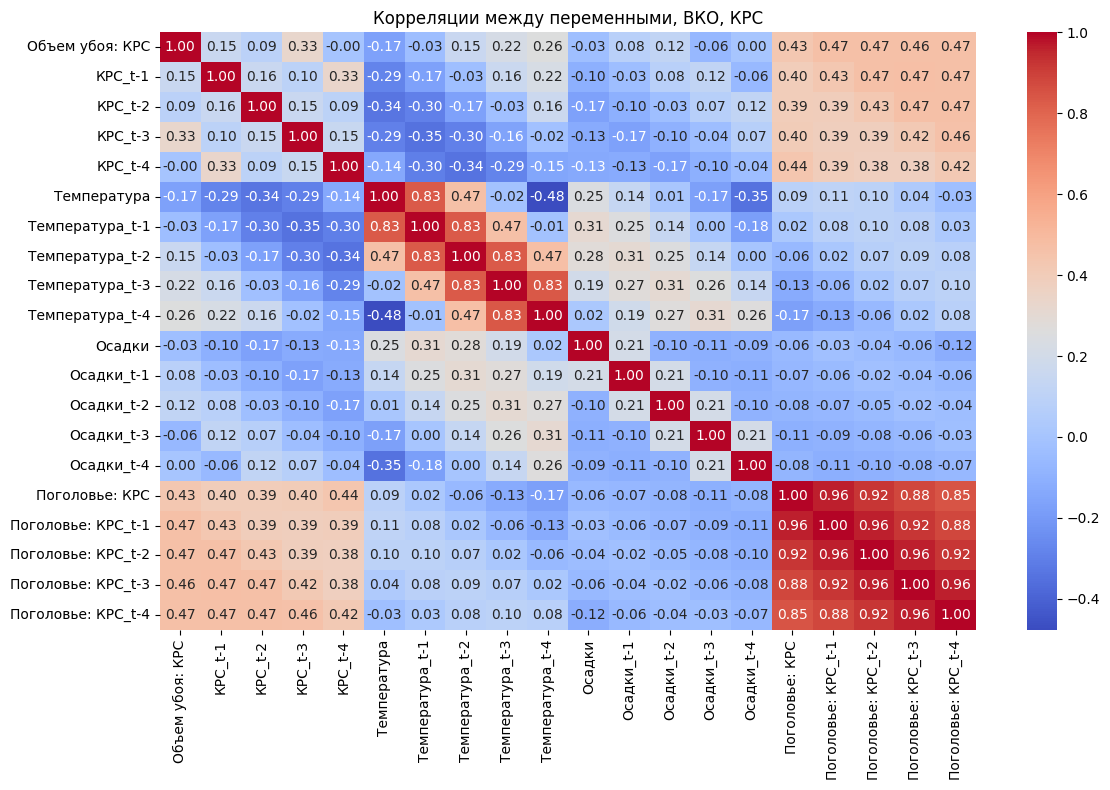

In [15]:
df_corr = df_vko_lagged[[col for col in df_vko_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]].dropna()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –í–ö–û, –ö–†–°")
plt.tight_layout()
plt.show()

<!-- * –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.51) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t-1, t-1 –∏ t-2 —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ;
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –ø–æ—Å–ª–µ –ª–∞–≥–∞ –≤ t-3. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏, –≤ —Ç–æ–º —á–∏—Å–ª–µ –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã, —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è; 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Ç–µ–∫—É—â–µ–≥–æ –∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–µ–≤ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.19 –∏ 0.12).

**–ú–û–ñ–ù–û –ï–©–ï –î–û–ë–ê–í–ò–¢–¨ –í–´–í–û–î–´ –ü–†–ò –ù–ï–û–ë–•–û–î–ò–ú–û–°–¢–ò** -->

–æ—Ç—Å–µ—á—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä—ã –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ

### Models

#### –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [16]:
df_vko = df_vko[["–ü–µ—Ä–∏–æ–¥",
    "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ö–†–°_t-1", "–ö–†–°_t-2", "–ö–†–°_t-3", "–ö–†–°_t-4",
    "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4",
    "–û—Å–∞–¥–∫–∏", "–û—Å–∞–¥–∫–∏_t-1", "–û—Å–∞–¥–∫–∏_t-2", "–û—Å–∞–¥–∫–∏_t-3", "–û—Å–∞–¥–∫–∏_t-4",
    "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4"]]
df_vko

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
480 2015-01-01          4151.27      NaN      NaN      NaN      NaN   
481 2015-02-01          6473.64  4151.27      NaN      NaN      NaN   
482 2015-03-01          6837.39  6473.64  4151.27      NaN      NaN   
483 2015-04-01          5875.35  6837.39  6473.64  4151.27      NaN   
484 2015-05-01          5952.33  5875.35  6837.39  6473.64  4151.27   
..         ...              ...      ...      ...      ...      ...   
595 2024-08-01          2845.28  3593.38  5971.67  3029.97  2194.18   
596 2024-09-01          5000.88  2845.28  3593.38  5971.67  3029.97   
597 2024-10-01          3396.22  5000.88  2845.28  3593.38  5971.67   
598 2024-11-01          4578.81  3396.22  5000.88  2845.28  3593.38   
599 2024-12-01          9958.40  4578.81  3396.22  5000.88  2845.28   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
480   -10.364516              NaN              NaN              NaN   
481    -9.839286       -10.364516              NaN              NaN   
482    -4.858065        -9.839286       -10.364516              NaN   
483     6.830000        -4.858065        -9.839286       -10.364516   
484    14.774194         6.830000        -4.858065        -9.839286   
..           ...              ...              ...              ...   
595    21.361290        22.509677        20.903333        15.641935   
596    10.743333        21.361290        22.509677        20.903333   
597     7.209677        10.743333        21.361290        22.509677   
598    -1.160000         7.209677        10.743333        21.361290   
599    -8.322581        -1.160000         7.209677        10.743333   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
480              NaN    29.4         NaN         NaN         NaN         NaN   
481              NaN    33.4        29.4         NaN         NaN         NaN   
482              NaN    41.2        33.4        29.4         NaN         NaN   
483              NaN    50.6        41.2        33.4        29.4         NaN   
484       -10.364516    63.8        50.6        41.2        33.4        29.4   
..               ...     ...         ...         ...         ...         ...   
595         9.290000    50.6       120.6        55.1        64.4        36.5   
596        15.641935    28.6        50.6       120.6        55.1        64.4   
597        20.903333    24.1        28.6        50.6       120.6        55.1   
598        22.509677    50.7        24.1        28.6        50.6       120.6   
599        21.361290    48.3        50.7        24.1        28.6        50.6   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
480        786783.0                 NaN                 NaN   
481        860746.0            786783.0                 NaN   
482        939284.0            860746.0            786783.0   
483       1013296.0            939284.0            860746.0   
484       1046072.0           1013296.0            939284.0   
..              ...                 ...                 ...   
595        387497.0            365217.0            390491.0   
596        410436.0            387497.0            365217.0   
597        403944.0            410436.0            387497.0   
598        395279.0            403944.0            410436.0   
599        382310.0            395279.0            403944.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
480                 NaN                 NaN  
481                 NaN                 NaN  
482                 NaN                 NaN  
483            786783.0                 NaN  
484            860746.0            786783.0  
..                  ...                 ...  
595            382209.0            338062.0  
596            390491.0            382209

In [17]:
df_vko_lagged

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   –ö–†–°_t-1   –ö–†–°_t-2   –ö–†–°_t-3  –ö–†–°_t-4  \
484 2015-05-01          5952.33   5875.35   6837.39   6473.64  4151.27   
485 2015-06-01         11066.14   5952.33   5875.35   6837.39  6473.64   
486 2015-07-01          8491.91  11066.14   5952.33   5875.35  6837.39   
487 2015-08-01          6608.14   8491.91  11066.14   5952.33  5875.35   
488 2015-09-01         11514.70   6608.14   8491.91  11066.14  5952.33   
..         ...              ...       ...       ...       ...      ...   
595 2024-08-01          2845.28   3593.38   5971.67   3029.97  2194.18   
596 2024-09-01          5000.88   2845.28   3593.38   5971.67  3029.97   
597 2024-10-01          3396.22   5000.88   2845.28   3593.38  5971.67   
598 2024-11-01          4578.81   3396.22   5000.88   2845.28  3593.38   
599 2024-12-01          9958.40   4578.81   3396.22   5000.88  2845.28   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
484    14.774194         6.830000        -4.858065        -9.839286   
485    20.636667        14.774194         6.830000        -4.858065   
486    21.306452        20.636667        14.774194         6.830000   
487    19.096774        21.306452        20.636667        14.774194   
488    11.086667        19.096774        21.306452        20.636667   
..           ...              ...              ...              ...   
595    21.361290        22.509677        20.903333        15.641935   
596    10.743333        21.361290        22.509677        20.903333   
597     7.209677        10.743333        21.361290        22.509677   
598    -1.160000         7.209677        10.743333        21.361290   
599    -8.322581        -1.160000         7.209677        10.743333   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
484       -10.364516    63.8        50.6        41.2        33.4        29.4   
485        -9.839286    13.7        63.8        50.6        41.2        33.4   
486        -4.858065    35.6        13.7        63.8        50.6        41.2   
487         6.830000    56.8        35.6        13.7        63.8        50.6   
488        14.774194    62.6        56.8        35.6        13.7        63.8   
..               ...     ...         ...         ...         ...         ...   
595         9.290000    50.6       120.6        55.1        64.4        36.5   
596        15.641935    28.6        50.6       120.6        55.1        64.4   
597        20.903333    24.1        28.6        50.6       120.6        55.1   
598        22.509677    50.7        24.1        28.6        50.6       120.6   
599        21.361290    48.3        50.7        24.1        28.6        50.6   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
484       1046072.0           1013296.0            939284.0   
485       1028143.0           1046072.0           1013296.0   
486        996874.0           1028143.0           1046072.0   
487        977346.0            996874.0           1028143.0   
488        943328.0            977346.0            996874.0   
..              ...                 ...                 ...   
595        387497.0            365217.0            390491.0   
596        410436.0            387497.0            365217.0   
597        403944.0            410436.0            387497.0   
598        395279.0            403944.0            410436.0   
599        382310.0            395279.0            403944.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
484            860746.0            786783.0  
485            939284.0            860746.0  
486           1013296.0            939284.0  
487           1046072.0           1013296.0  
488           1028143.0           1046072.0  
..                  ...                 ...  
595            382209.0            338062.0  
596  

In [18]:
df_vif = df_vko_lagged[[col for col in df_vko_lagged.columns if col not in ["–ü–µ—Ä–∏–æ–¥"]]]

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable        VIF
0                const  29.883663
1              –ö–†–°_t-1   2.047419
2              –ö–†–°_t-2   2.158194
3              –ö–†–°_t-3   2.136852
4              –ö–†–°_t-4   1.991941
5          –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  13.618569
6      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  18.275894
7      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  17.835914
8      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  18.821626
9      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  12.793358
10              –û—Å–∞–¥–∫–∏   1.296015
11          –û—Å–∞–¥–∫–∏_t-1   1.247903
12          –û—Å–∞–¥–∫–∏_t-2   1.284904
13          –û—Å–∞–¥–∫–∏_t-3   1.258501
14          –û—Å–∞–¥–∫–∏_t-4   1.421349
15      –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  16.793973
16  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  31.922613
17  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  31.489920
18  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  31.246522
19  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  17.884261

In [19]:
def forward_selection(data, target, candidate_features, criterion="adj_r2"):
    remaining = list(candidate_features)
    selected = []
    best_score = -float("inf")
    best_model = None

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            features = selected + [candidate]
            X = sm.add_constant(data[features])
            y = data[target]
            model = sm.OLS(y, X).fit()

            if criterion == "adj_r2":
                score = model.rsquared_adj
            elif criterion == "aic":
                score = -model.aic  # negative for maximizing
            else:
                raise ValueError("criterion must be 'adj_r2' or 'aic'")

            scores_with_candidates.append((score, candidate, model))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate, model = scores_with_candidates[0]

        if best_new_score > best_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            best_score = best_new_score
            best_model = model
            print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
        else:
            print("‚õî No improvement. Stopping.")
            break

    return selected, best_model


In [20]:
# Define target and candidate predictors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
candidate_features = ['–û—Å–∞–¥–∫–∏', '–û—Å–∞–¥–∫–∏_t-3', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-1',
    '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1',
    '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1',
    '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2', '–ö–†–°_t-1']

# Drop rows with missing values
df_mlr = df_vko[candidate_features + [target]].dropna()

# Run forward selection
selected_features, final_model = forward_selection(df_mlr, target, candidate_features, criterion="adj_r2")

# Show final summary

print(selected_features)
print("\nüßæ Final Model Summary:")
print(final_model.summary())



‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2, ADJ_R2: 0.2119
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, ADJ_R2: 0.2515
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2, ADJ_R2: 0.3082
‚úÖ Added: –ö–†–°_t-2, ADJ_R2: 0.3524
‚úÖ Added: –ö–†–°_t-1, ADJ_R2: 0.4187
‚úÖ Added: –ö–†–°_t-4, ADJ_R2: 0.4451
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1, ADJ_R2: 0.4642
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1, ADJ_R2: 0.4748
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-2, ADJ_R2: 0.4779
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-3, ADJ_R2: 0.4825
‚õî No improvement. Stopping.
['–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–ö–†–°_t-2', '–ö–†–°_t-1', '–ö–†–°_t-4', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-3']

üßæ Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:     

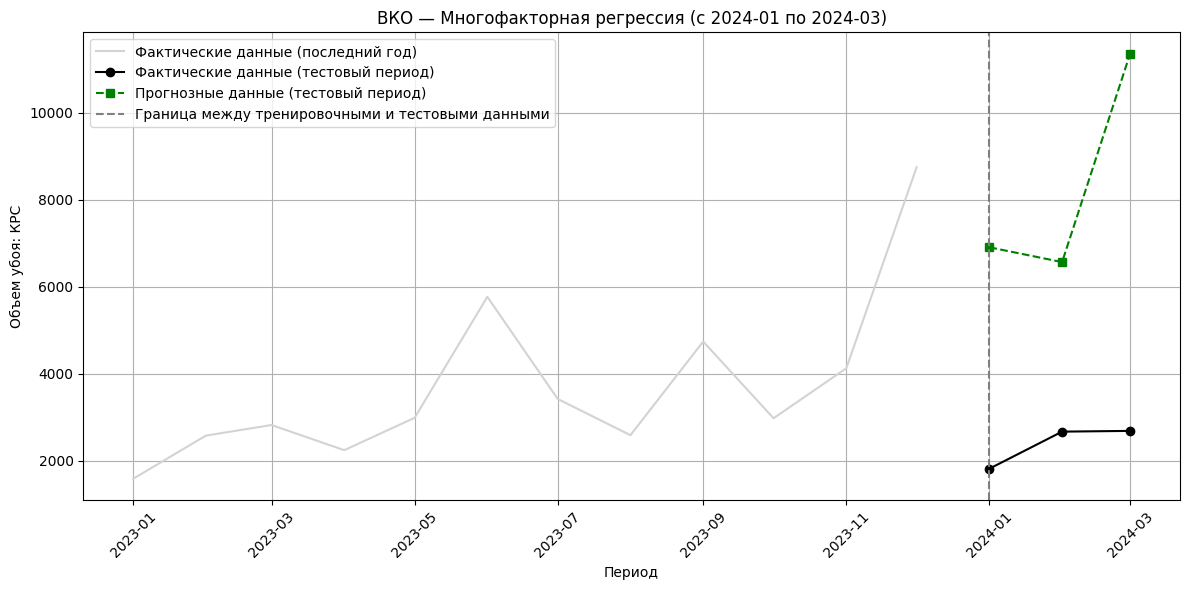

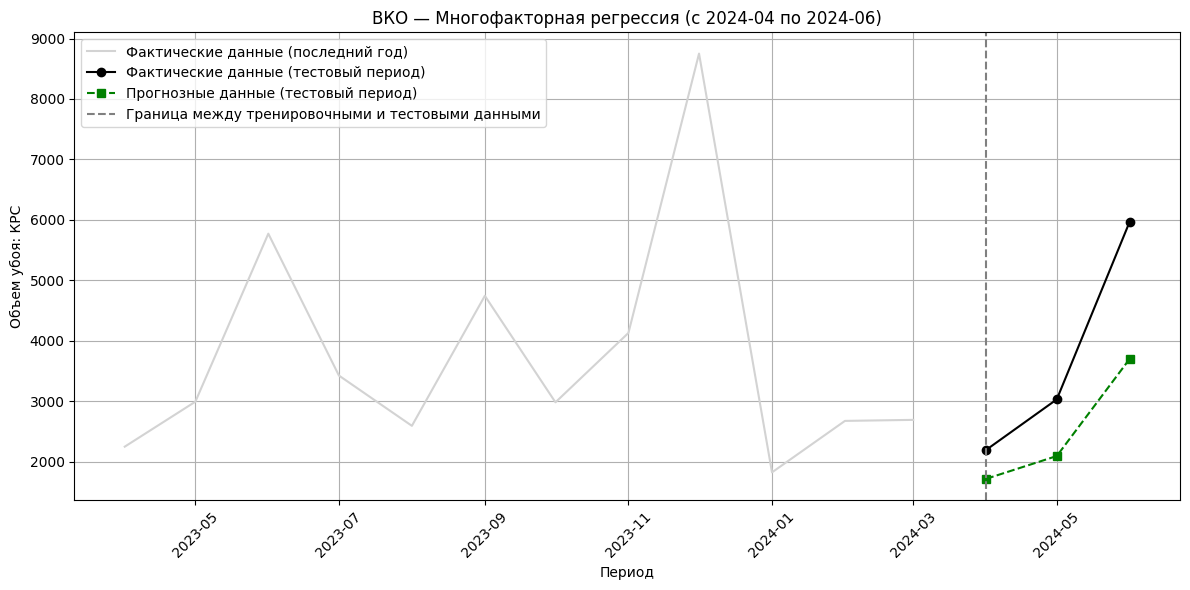

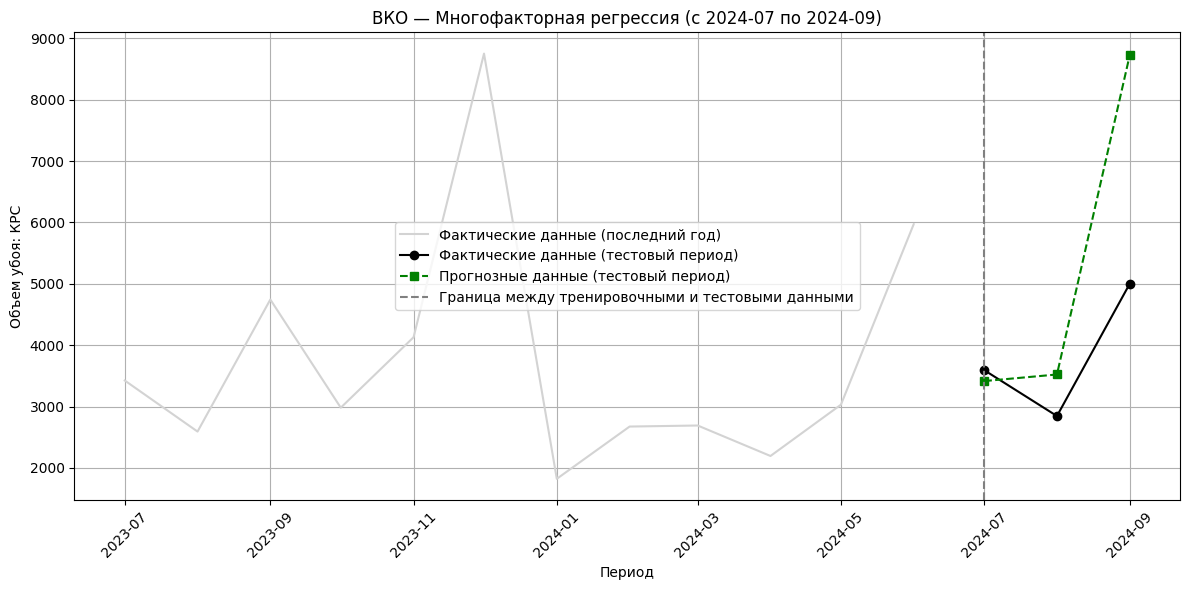

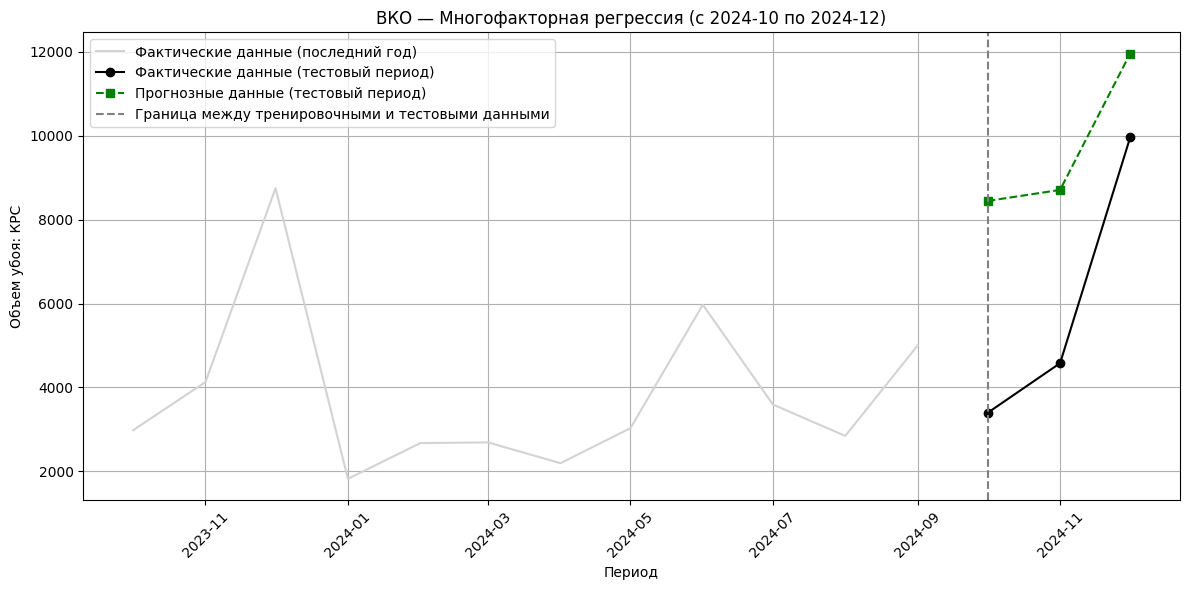

In [21]:
# Ensure your dataframe is sorted by time
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()

# # Selected features
# selected_features = [
#     '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1'
# ]

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 rolling test sets for 2024
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    # Drop NAs and align predictors
    X_train = sm.add_constant(train_df[selected_features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[selected_features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    # print(y_test, '\n', y_pred, '\n', y_test-y_pred)

    r2 = r2_score(y_test, y_pred)
    # print("Zero values in y_test:", (y_test == 0).sum())


    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [22]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE    MAPE (%)          R¬≤
0  2024-01 to 2024-03  6223.515061  5883.637626  249.000726 -234.569227
1  2024-04 to 2024-06  1444.716120  1228.754913   30.256284    0.204759
2  2024-07 to 2024-09  2187.719575  1526.453739   34.407580   -4.993200
3  2024-10 to 2024-12  3939.630734  3726.768729   86.328002   -0.903063
4             Average  3448.895373  3091.403752   99.998148  -60.065183


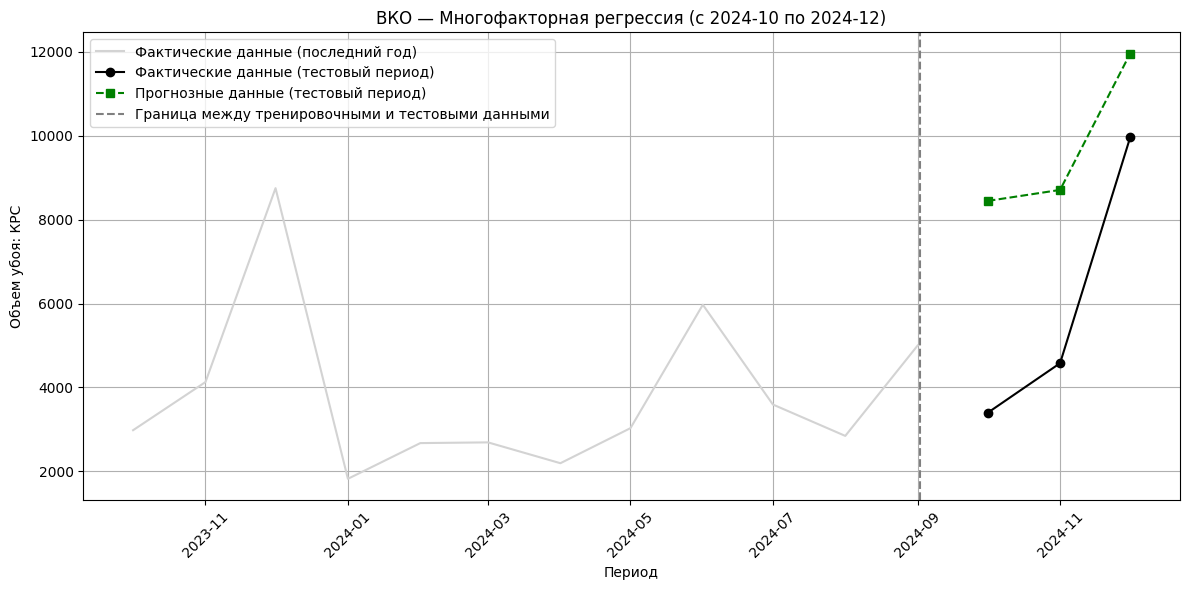

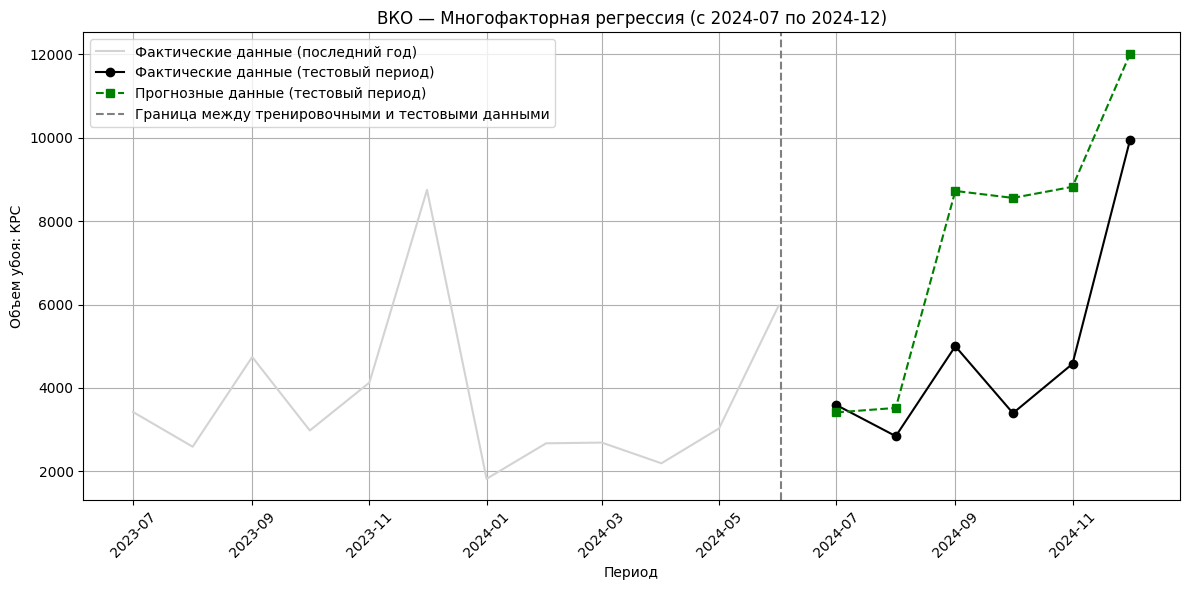

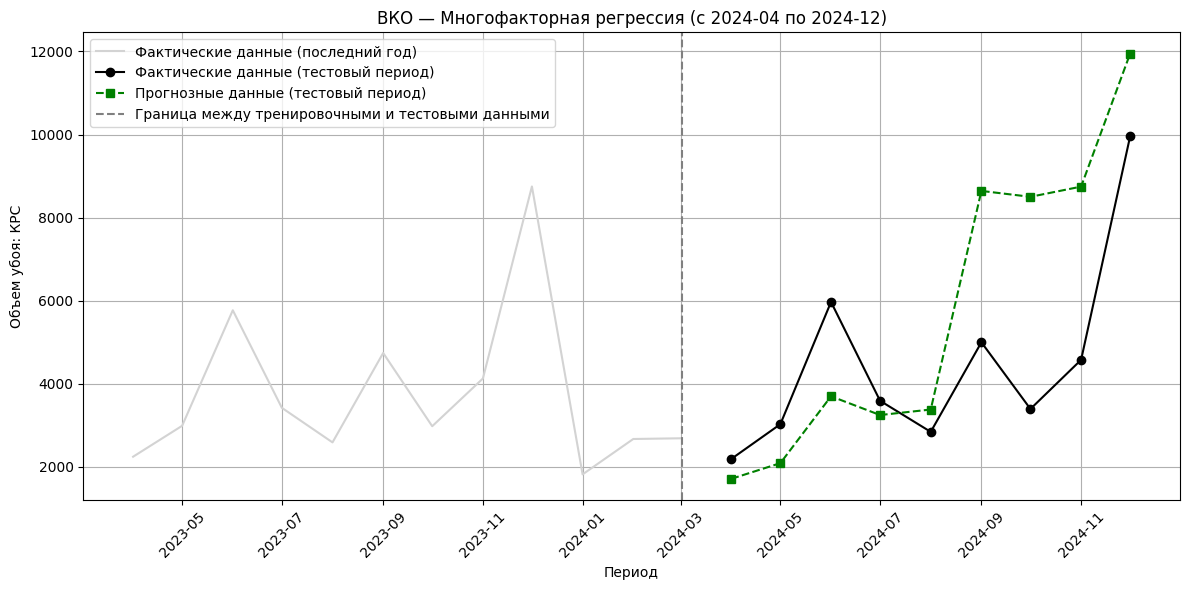

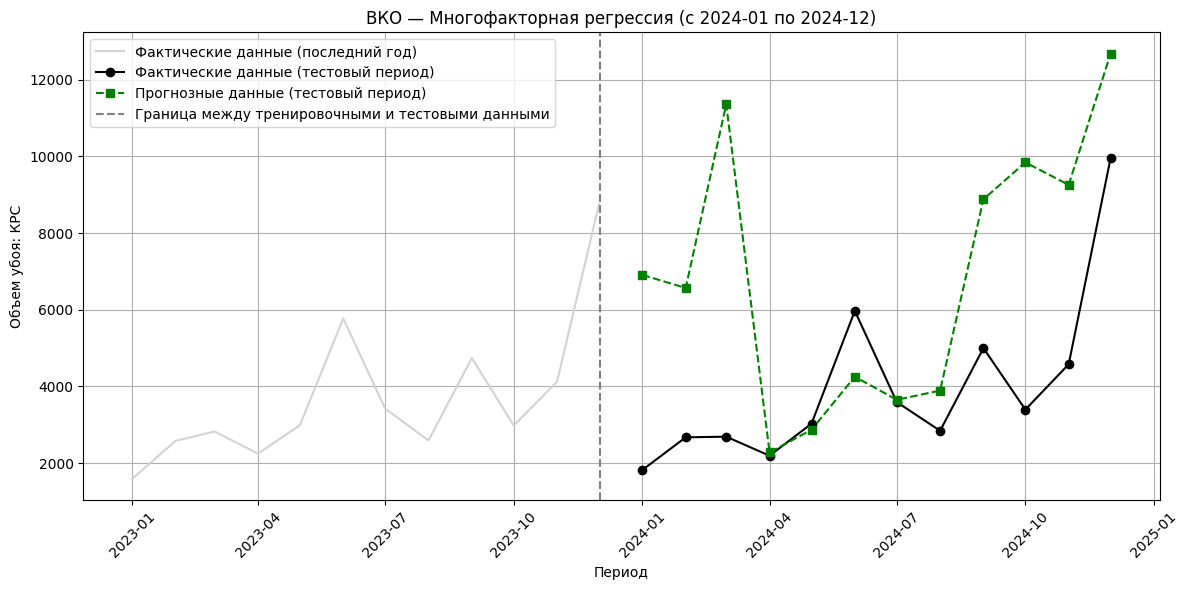

In [23]:
# Ensure your dataframe is sorted by time
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()

# # Selected features
# selected_features = [
#     '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–ö–†–°_t-4', '–ö–†–°_t-2', '–û—Å–∞–¥–∫–∏_t-1', '–û—Å–∞–¥–∫–∏_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1'
# ]

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 rolling test sets for 2024
horizons = [3, 6, 9, 12]

for horizon in horizons:

    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split data
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    # Drop NAs and align predictors
    X_train = sm.add_constant(train_df[selected_features])
    y_train = train_df[target]

    X_test = sm.add_constant(test_df[selected_features])
    y_test = test_df[target]

    # Fit and predict
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100
    # print(y_test, '\n', y_pred, '\n', y_test-y_pred)

    r2 = r2_score(y_test, y_pred)
    # print("Zero values in y_test:", (y_test == 0).sum())


    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R¬≤": r2
    })
    plt.figure(figsize=(12, 6))
    last_train_year = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train_year["–ü–µ—Ä–∏–æ–¥"], last_train_year[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")

    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test.values, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred.values, marker="s", linestyle="--", color="green", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")

    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî –ú–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
avg_row = results_df.mean(numeric_only=True).to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

# Show results
print(results_df)

          Test period         RMSE          MAE    MAPE (%)        R¬≤
0  2024-10 to 2024-12  3939.630734  3726.768729   86.328002 -0.903063
1  2024-07 to 2024-12  3247.369518  2674.499534   61.436837 -0.866933
2  2024-04 to 2024-12  2735.234482  2163.650044   50.376777 -0.514043
3  2024-01 to 2024-12  4145.257743  3203.992306  101.693609 -2.748890
4             Average  3516.873120  2942.227653   74.958806 -1.258233


In [25]:
df_vko

–ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  \
480 2015-01-01          4151.27      NaN      NaN      NaN      NaN   
481 2015-02-01          6473.64  4151.27      NaN      NaN      NaN   
482 2015-03-01          6837.39  6473.64  4151.27      NaN      NaN   
483 2015-04-01          5875.35  6837.39  6473.64  4151.27      NaN   
484 2015-05-01          5952.33  5875.35  6837.39  6473.64  4151.27   
..         ...              ...      ...      ...      ...      ...   
595 2024-08-01          2845.28  3593.38  5971.67  3029.97  2194.18   
596 2024-09-01          5000.88  2845.28  3593.38  5971.67  3029.97   
597 2024-10-01          3396.22  5000.88  2845.28  3593.38  5971.67   
598 2024-11-01          4578.81  3396.22  5000.88  2845.28  3593.38   
599 2024-12-01          9958.40  4578.81  3396.22  5000.88  2845.28   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  \
480   -10.364516              NaN              NaN              NaN   
481    -9.839286       -10.364516              NaN              NaN   
482    -4.858065        -9.839286       -10.364516              NaN   
483     6.830000        -4.858065        -9.839286       -10.364516   
484    14.774194         6.830000        -4.858065        -9.839286   
..           ...              ...              ...              ...   
595    21.361290        22.509677        20.903333        15.641935   
596    10.743333        21.361290        22.509677        20.903333   
597     7.209677        10.743333        21.361290        22.509677   
598    -1.160000         7.209677        10.743333        21.361290   
599    -8.322581        -1.160000         7.209677        10.743333   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-4  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-1  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-4  \
480              NaN    29.4         NaN         NaN         NaN         NaN   
481              NaN    33.4        29.4         NaN         NaN         NaN   
482              NaN    41.2        33.4        29.4         NaN         NaN   
483              NaN    50.6        41.2        33.4        29.4         NaN   
484       -10.364516    63.8        50.6        41.2        33.4        29.4   
..               ...     ...         ...         ...         ...         ...   
595         9.290000    50.6       120.6        55.1        64.4        36.5   
596        15.641935    28.6        50.6       120.6        55.1        64.4   
597        20.903333    24.1        28.6        50.6       120.6        55.1   
598        22.509677    50.7        24.1        28.6        50.6       120.6   
599        21.361290    48.3        50.7        24.1        28.6        50.6   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  \
480        786783.0                 NaN                 NaN   
481        860746.0            786783.0                 NaN   
482        939284.0            860746.0            786783.0   
483       1013296.0            939284.0            860746.0   
484       1046072.0           1013296.0            939284.0   
..              ...                 ...                 ...   
595        387497.0            365217.0            390491.0   
596        410436.0            387497.0            365217.0   
597        403944.0            410436.0            387497.0   
598        395279.0            403944.0            410436.0   
599        382310.0            395279.0            403944.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-4  
480                 NaN                 NaN  
481                 NaN                 NaN  
482                 NaN                 NaN  
483            786783.0                 NaN  
484            860746.0            786783.0  
..                  ...                 ...  
595            382209.0            338062.0  
596            390491.0            382209

#### SARIMA (auto-arima)

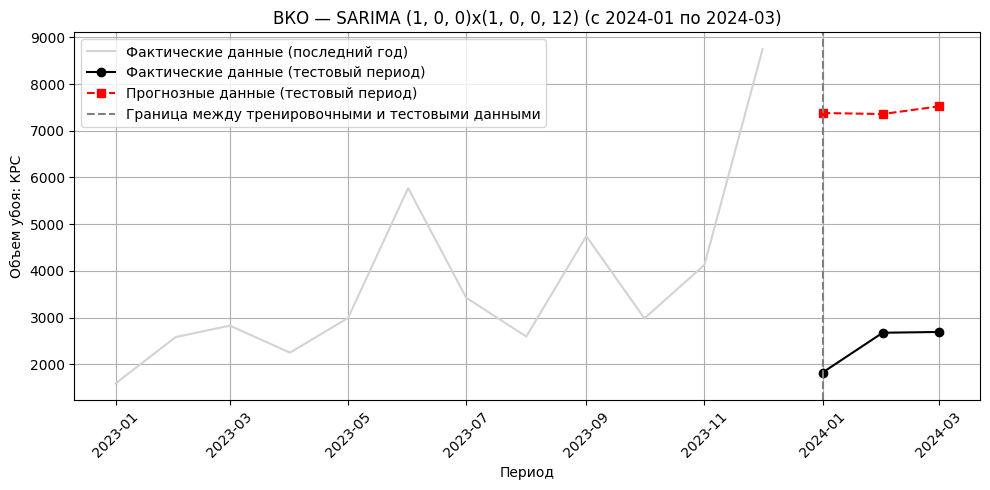

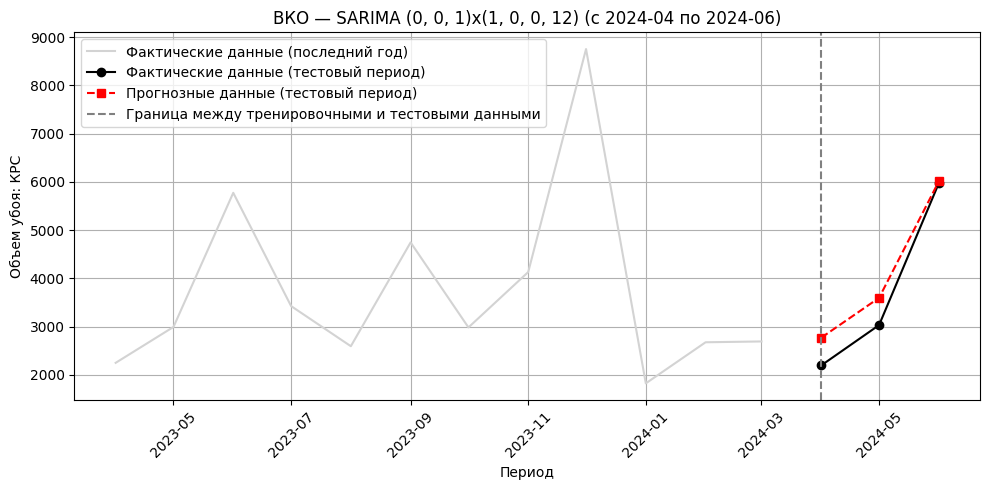

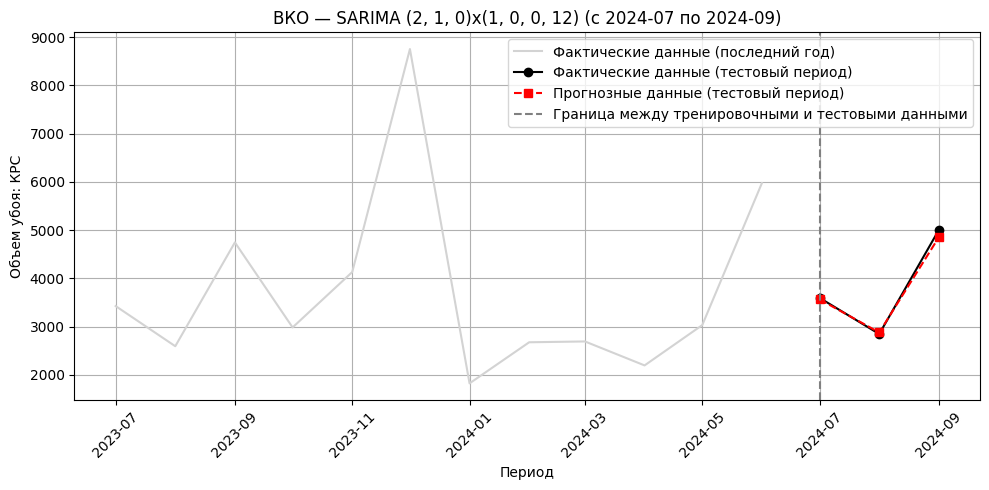

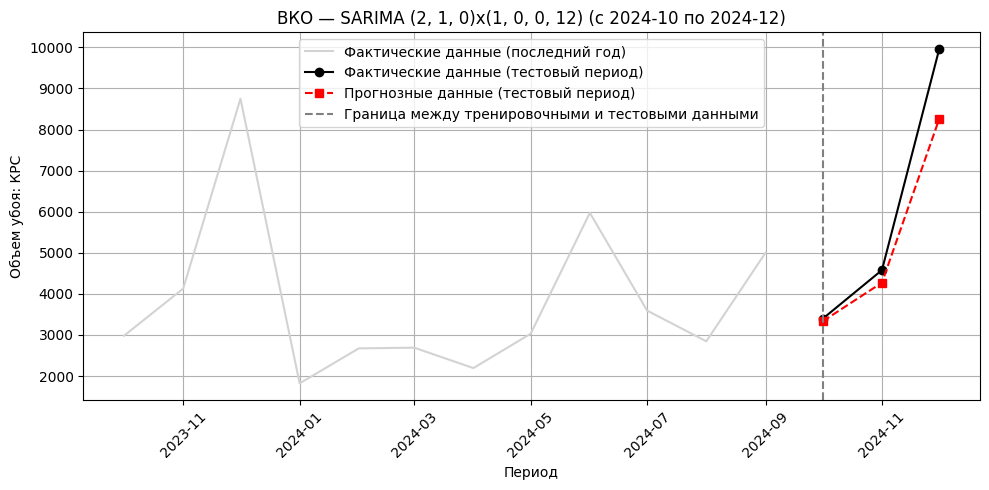

In [26]:
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# –û–ø—Ä–µ–¥–µ–ª–∏–º 4 —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–µ—Ä–∏–æ–¥–∞ –Ω–∞ 3 –º–µ—Å—è—Ü–∞
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=3)
        forecast = pd.Series(forecast).reset_index(drop=True)
        # forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        # print(y_test, '\n', forecast, '\n', y_test-forecast)
        # print("Are indices equal?", y_test.index.equals(forecast.index))



        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {test_start.strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [27]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE    MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  5039.505377  5025.040227  219.934231    (1, 0, 0)   
1  2024-04 to 2024-06   465.414256   392.152584   15.144279    (0, 0, 1)   
2  2024-07 to 2024-09    90.503571    70.902820    1.657108    (2, 1, 0)   
3  2024-10 to 2024-12   997.451554   689.056378    8.523575    (2, 1, 0)   
4             Average  1648.218689  1544.288002   61.314798          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 0, 12)  
2  (1, 0, 0, 12)  
3  (1, 0, 0, 12)  
4            NaN  


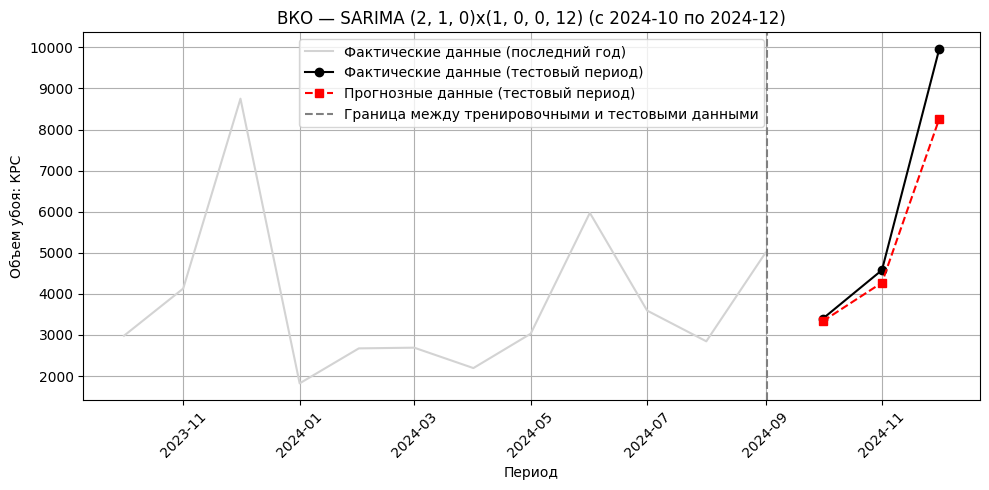

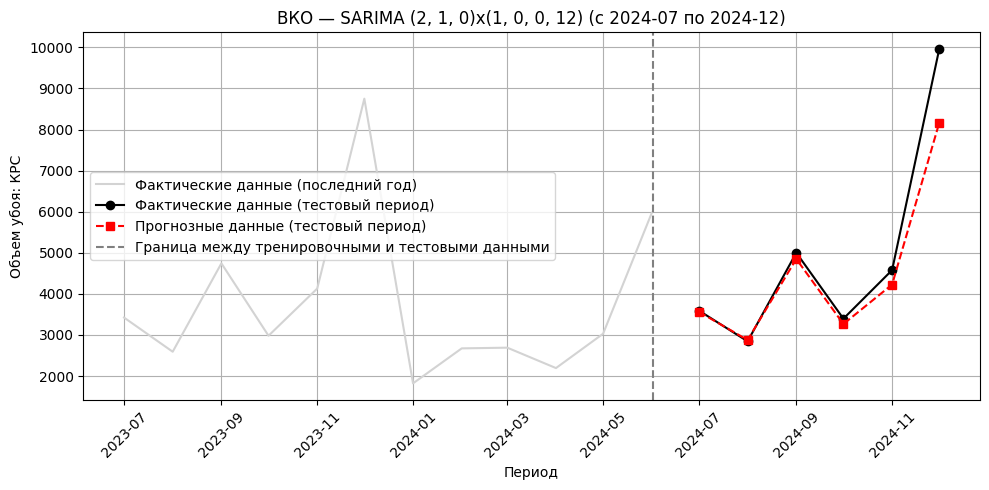

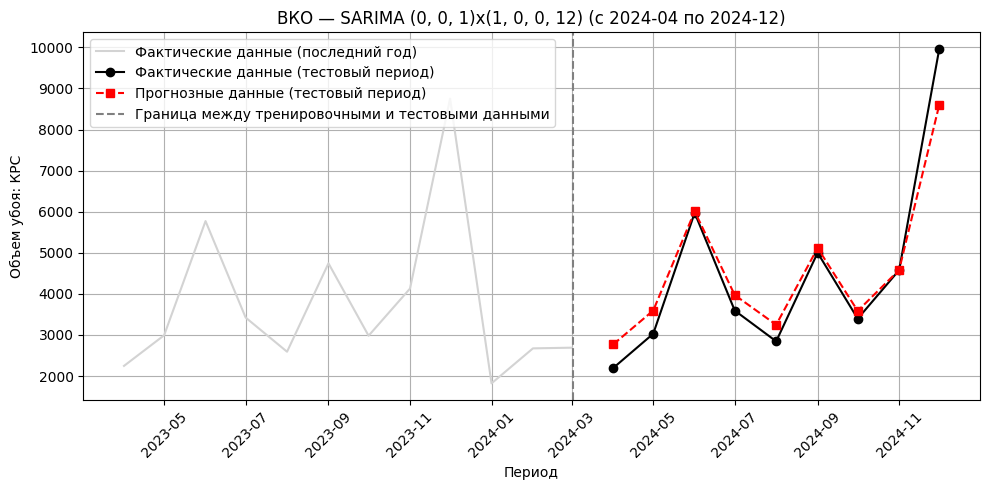

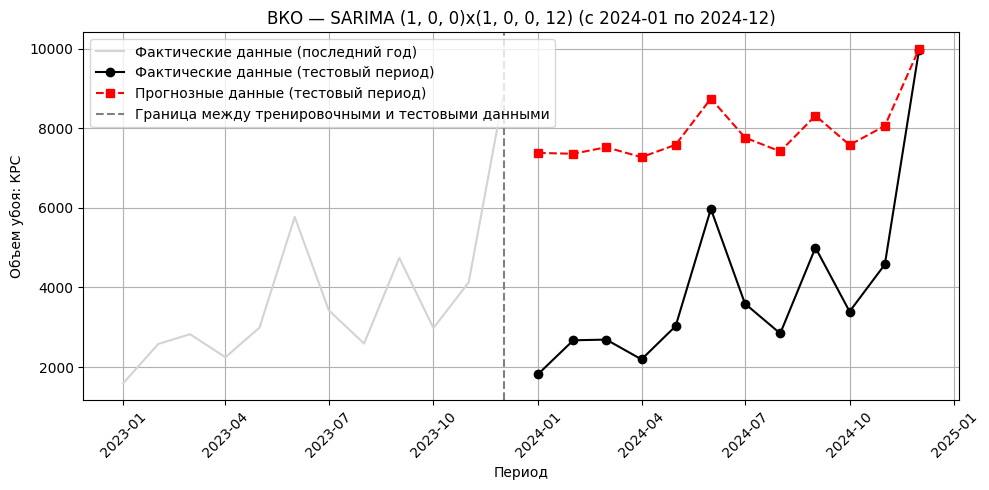

In [28]:
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)
    # –†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    try:
        model = auto_arima(
            y_train,
            seasonal=True,
            m=12,
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        forecast = model.predict(n_periods=horizon)
        forecast = pd.Series(forecast).reset_index(drop=True)
        # forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        # print(y_test, '\n', forecast, '\n', y_test-forecast)
        # print("Are indices equal?", y_test.index.equals(forecast.index))



        # –û—Ü–µ–Ω–∫–∞
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order
        })

        # –ì—Ä–∞—Ñ–∏–∫
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMA {model.order}x{model.seasonal_order} (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        # print("Zero values in y_test:", (y_test == 0).sum())


    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")

In [29]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)


          Test period         RMSE          MAE    MAPE (%) SARIMA order  \
0  2024-10 to 2024-12   997.451554   689.056378    8.523575    (2, 1, 0)   
1  2024-07 to 2024-12   752.213797   415.236658    5.753767    (2, 1, 0)   
2  2024-04 to 2024-12   563.247508   402.830036   10.188738    (0, 0, 1)   
3  2024-01 to 2024-12  4176.594161  3936.196028  135.881647    (1, 0, 0)   
4             Average  1622.376755  1360.829775   40.086932          NaN   

  Seasonal order  
0  (1, 0, 0, 12)  
1  (1, 0, 0, 12)  
2  (1, 0, 0, 12)  
3  (1, 0, 0, 12)  
4            NaN  


#### SARIMAX

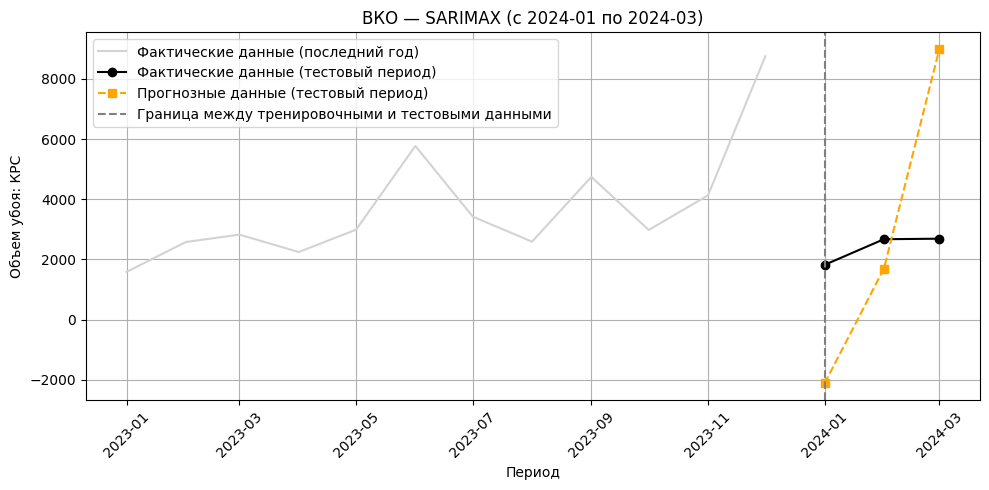

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


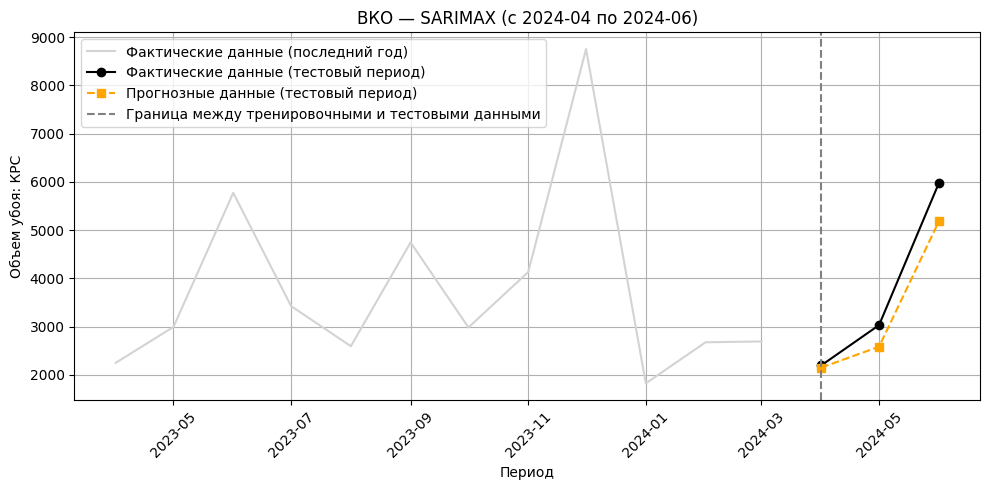

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


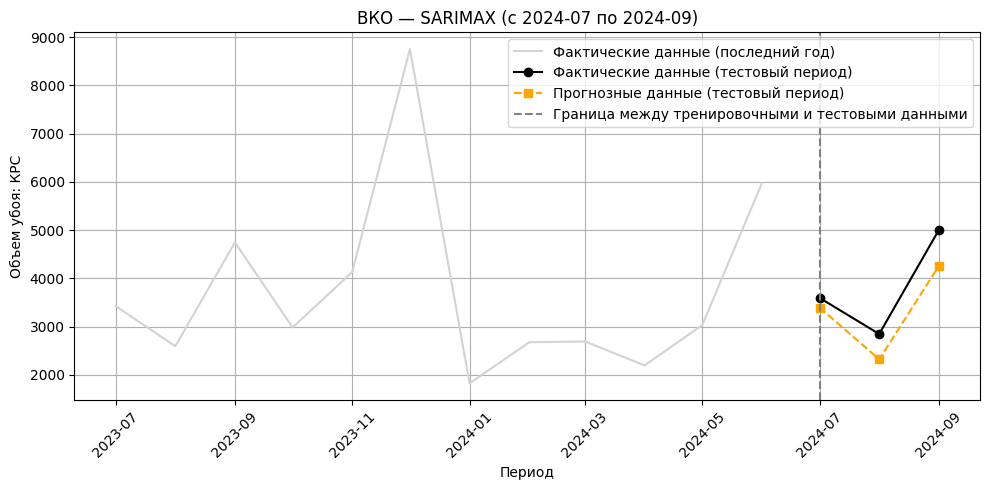

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


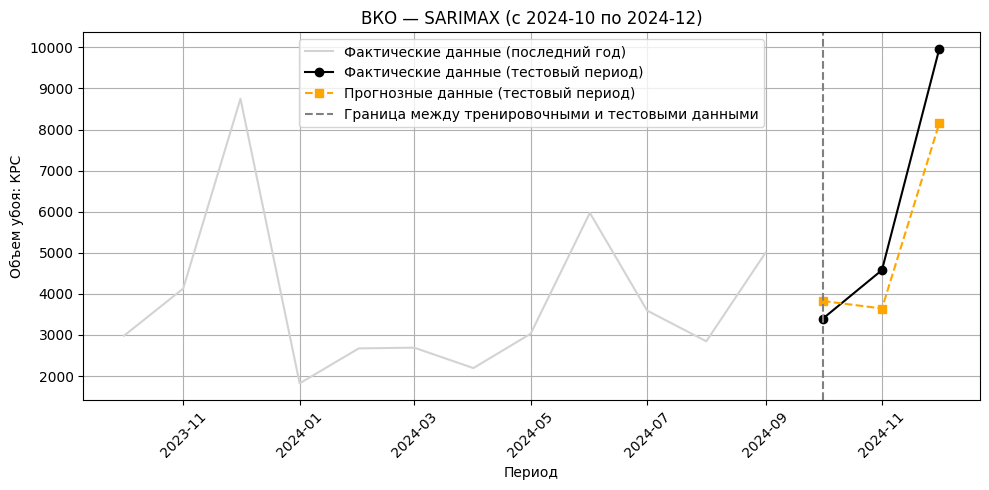

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your exogenous variables
exog_vars = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1']

df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[exog_vars].reset_index(drop=True)
    exog_test = test_df[exog_vars].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 0, 1),
            seasonal_order=(1, 0, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=3, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMAX (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [35]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)



          Test period         RMSE          MAE    MAPE (%) SARIMA order  \
0  2024-01 to 2024-03  4326.141064  3737.934147  162.237803            0   
1  2024-04 to 2024-06   527.131570   429.069275   10.044345            0   
2  2024-07 to 2024-09   538.932434   490.024409   12.972193            0   
3  2024-10 to 2024-12  1202.351893  1058.593146   17.090827            0   
4             Average  1648.639240  1428.905244   50.586292                

  Seasonal order  
0             12  
1             12  
2             12  
3             12  
4                 


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


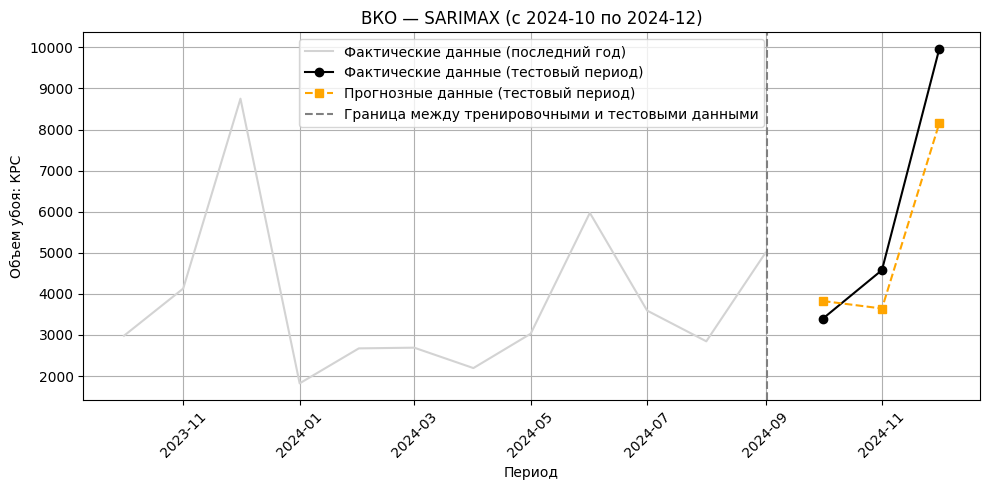

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


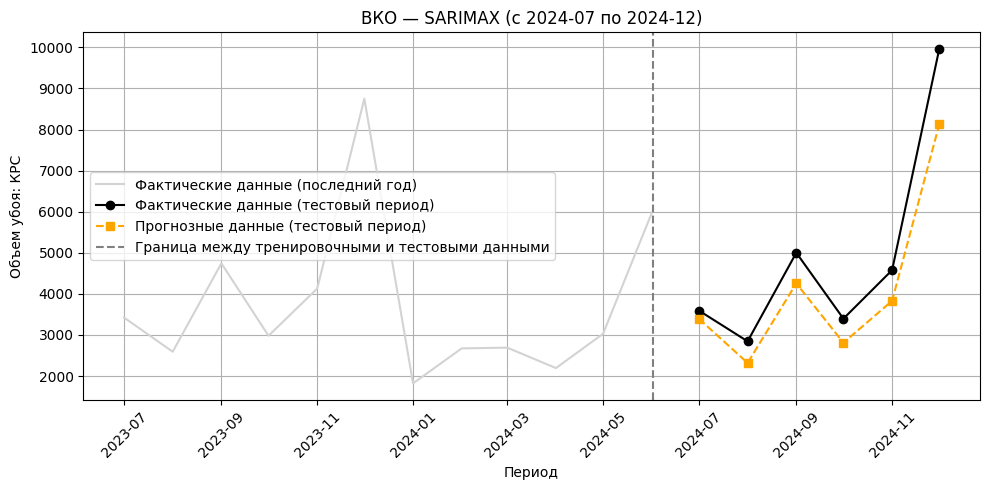

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


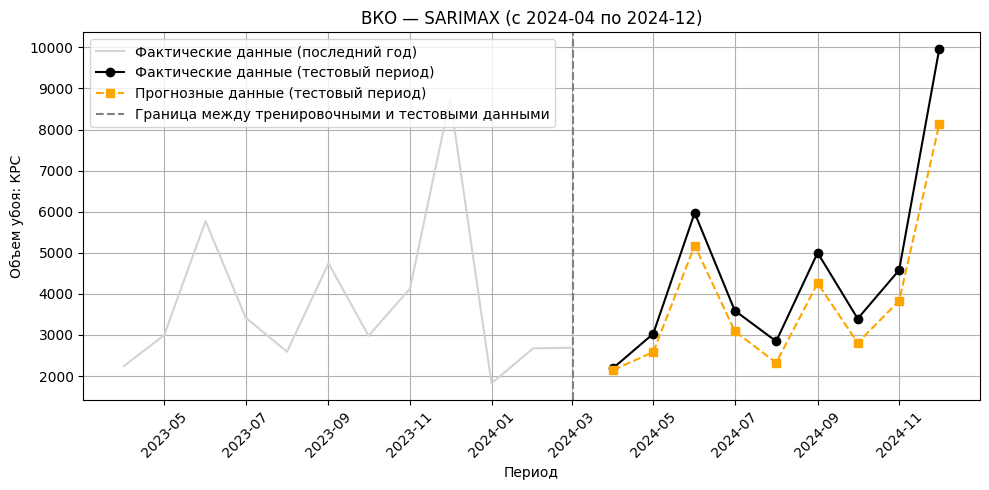

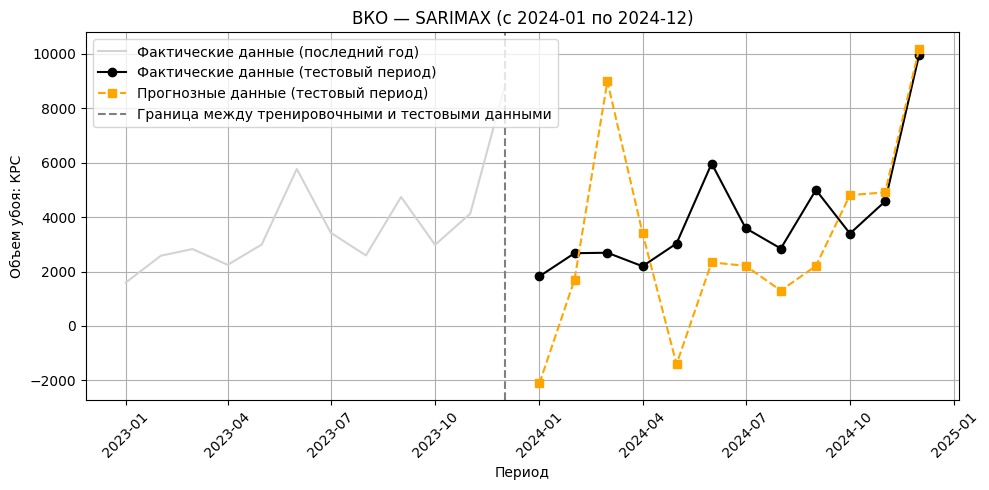

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your exogenous variables
exog_vars = ['–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1']

df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

horizons = [3, 6, 9, 12]

for horizon in horizons:
    # test_start = pd.to_datetime(start)
    # test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    # Split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start]
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)]

    y_train = train_df[target].reset_index(drop=True)
    y_test = test_df[target].reset_index(drop=True)

    exog_train = train_df[exog_vars].reset_index(drop=True)
    exog_test = test_df[exog_vars].reset_index(drop=True)

    try:
        model = SARIMAX(
            endog=y_train,
            exog=exog_train,
            order=(0, 0, 1),
            seasonal_order=(1, 0, 0, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        forecast_res = model.get_forecast(steps=horizon, exog=exog_test)
        forecast = forecast_res.predicted_mean.reset_index(drop=True)

        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape,
            "SARIMA order": model.model_orders["ar"],
            "Seasonal order": model.model_orders.get("seasonal_ar", None)
        })

        # Plot
        plt.figure(figsize=(10, 5))
        last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
        plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], forecast, marker="s", linestyle="--", color="orange", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
        plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
        plt.title(f"–í–ö–û ‚Äî SARIMAX (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
        plt.xlabel("–ü–µ—Ä–∏–æ–¥")
        plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ –ø–µ—Ä–∏–æ–¥–µ {start}: {e}")


In [37]:
# –í—ã–≤–æ–¥ –º–µ—Ç—Ä–∏–∫ –¥–ª—è SARIMAX
results_df = pd.DataFrame(results)

# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
avg_metrics = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_metrics["Test period"] = "Average"
avg_metrics["SARIMA order"] = ""
avg_metrics["Seasonal order"] = ""

# –î–æ–±–∞–≤–∏–º —Å—Ç—Ä–æ–∫—É —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
results_df = pd.concat([results_df, pd.DataFrame([avg_metrics])], ignore_index=True)

# –í—ã–≤–æ–¥
print(results_df)

          Test period         RMSE          MAE   MAPE (%) SARIMA order  \
0  2024-10 to 2024-12  1202.351893  1058.593146  17.090827            0   
1  2024-07 to 2024-12   925.596184   773.122882  15.154874            0   
2  2024-04 to 2024-12   828.330375   691.211673  14.366128            0   
3  2024-01 to 2024-12  2955.872528  2350.617922  79.153076            0   
4             Average  1478.037745  1218.386406  31.441226                

  Seasonal order  
0             12  
1             12  
2             12  
3             12  
4                 


#### Prophet

18:28:35 - cmdstanpy - INFO - Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing


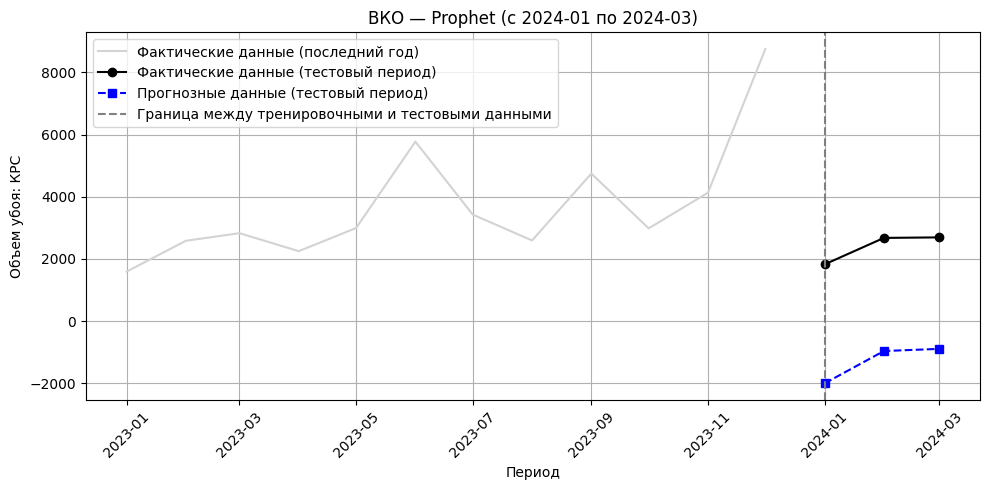

18:28:36 - cmdstanpy - INFO - Chain [1] start processing
18:28:36 - cmdstanpy - INFO - Chain [1] done processing


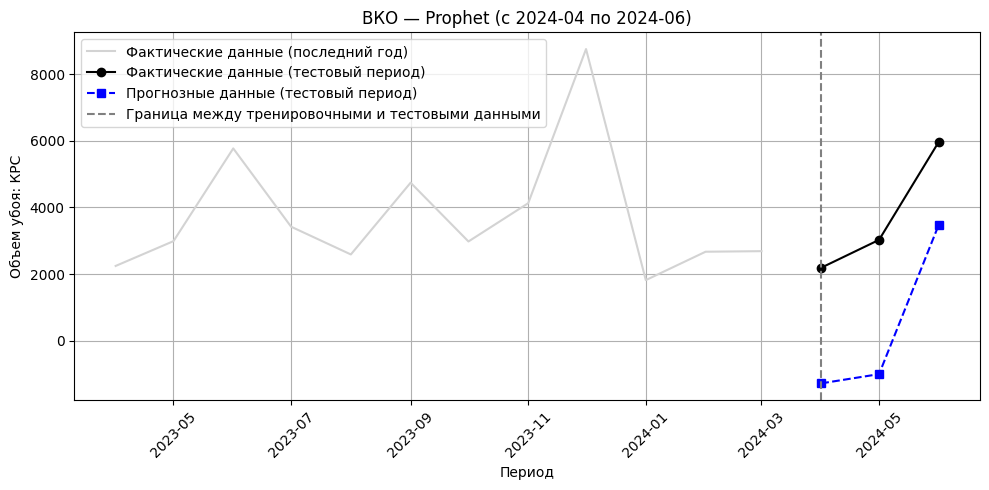

18:28:36 - cmdstanpy - INFO - Chain [1] start processing
18:28:36 - cmdstanpy - INFO - Chain [1] done processing


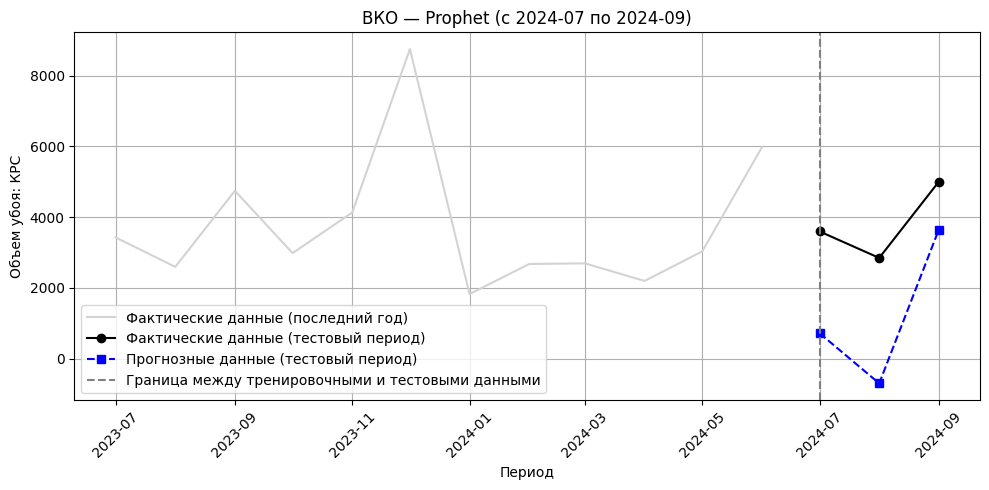

18:28:37 - cmdstanpy - INFO - Chain [1] start processing
18:28:37 - cmdstanpy - INFO - Chain [1] done processing


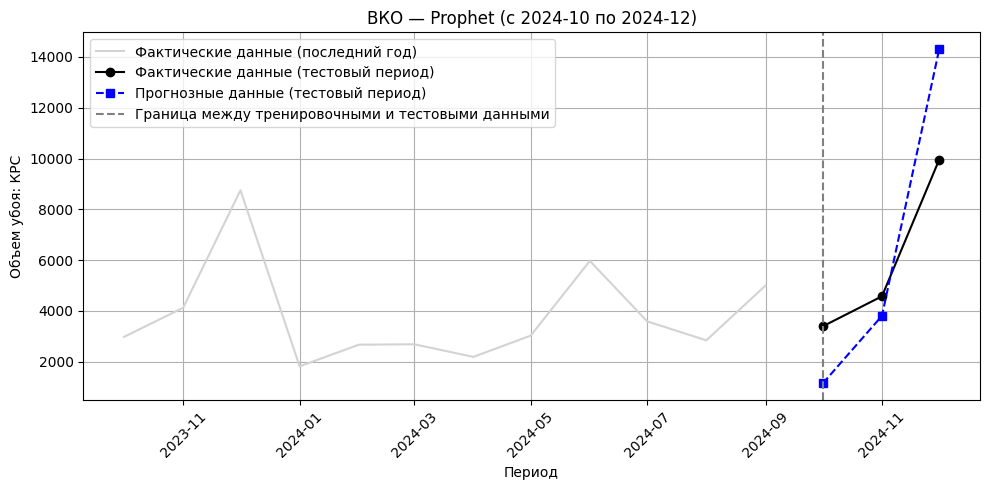

In [38]:
# Prepare Data
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])

target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
results = []

# Define 4 test periods
start_dates = ["2024-01", "2024-04", "2024-07", "2024-10"]

for start in start_dates:
    test_start = pd.to_datetime(start)
    test_end = test_start + pd.DateOffset(months=3) - pd.DateOffset(days=1)

    # Train/test split
    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Initialize Prophet
    model = Prophet()

    # Optional: add regressors
    # model.add_regressor("–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞")
    # model.add_regressor("–û—Å–∞–¥–∫–∏")
    # model.add_regressor("–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°")
    # prophet_train["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"] = train_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].values
    # prophet_test["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"] = test_df["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].values

    # Fit
    model.fit(prophet_train)

    # Create future dataframe
    future = model.make_future_dataframe(periods=3, freq="M")
    forecast = model.predict(future)
# forecast
# prophet_test

    # Extract forecast for test period only
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{start} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî Prophet (—Å {start} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [39]:
results_df = pd.DataFrame(results)
avg = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg["Test period"] = "Average"
results_df = pd.concat([results_df, pd.DataFrame([avg])], ignore_index=True)
print(results_df)

          Test period         RMSE          MAE    MAPE (%)
0  2024-01 to 2024-03  3686.737602  3685.281368  159.851237
1  2024-04 to 2024-06  3386.159998  3325.600413  110.825955
2  2024-07 to 2024-09  2750.144641  2592.374920   77.261825
3  2024-10 to 2024-12  2860.000392  2454.354327   42.187972
4             Average  3170.760658  3014.402757   97.531747


18:28:47 - cmdstanpy - INFO - Chain [1] start processing
18:28:47 - cmdstanpy - INFO - Chain [1] done processing



üîπ –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 3 –º–µ—Å—è—Ü–µ–≤


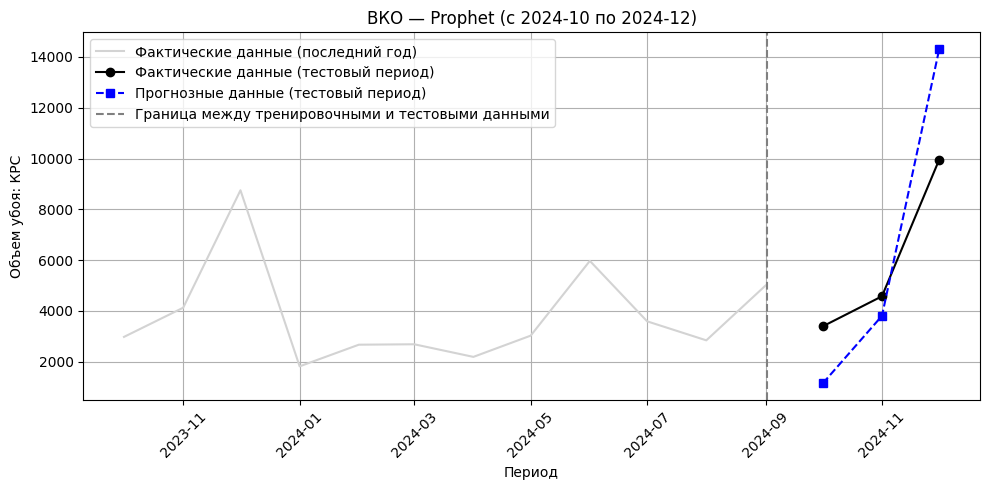

18:28:47 - cmdstanpy - INFO - Chain [1] start processing
18:28:47 - cmdstanpy - INFO - Chain [1] done processing



üîπ –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 6 –º–µ—Å—è—Ü–µ–≤


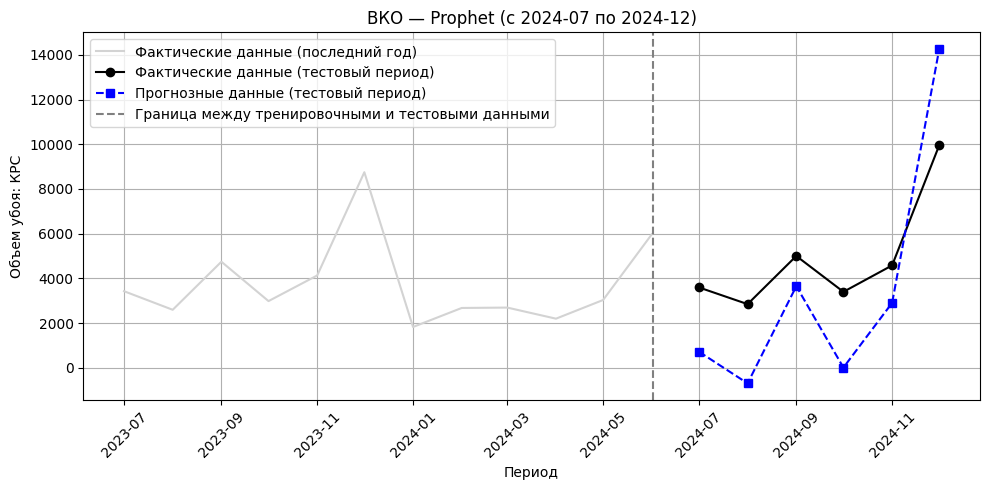

18:28:48 - cmdstanpy - INFO - Chain [1] start processing
18:28:48 - cmdstanpy - INFO - Chain [1] done processing



üîπ –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 9 –º–µ—Å—è—Ü–µ–≤


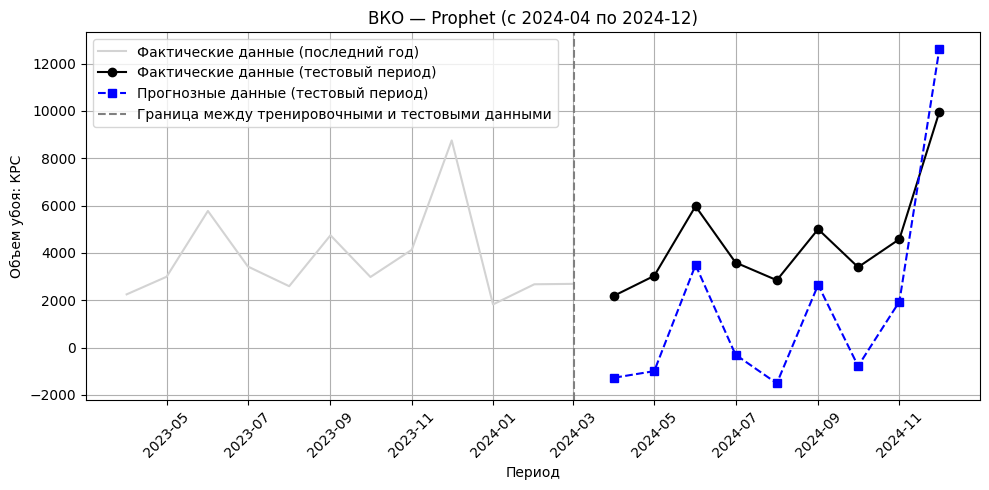

18:28:48 - cmdstanpy - INFO - Chain [1] start processing
18:28:48 - cmdstanpy - INFO - Chain [1] done processing



üîπ –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ 12 –º–µ—Å—è—Ü–µ–≤


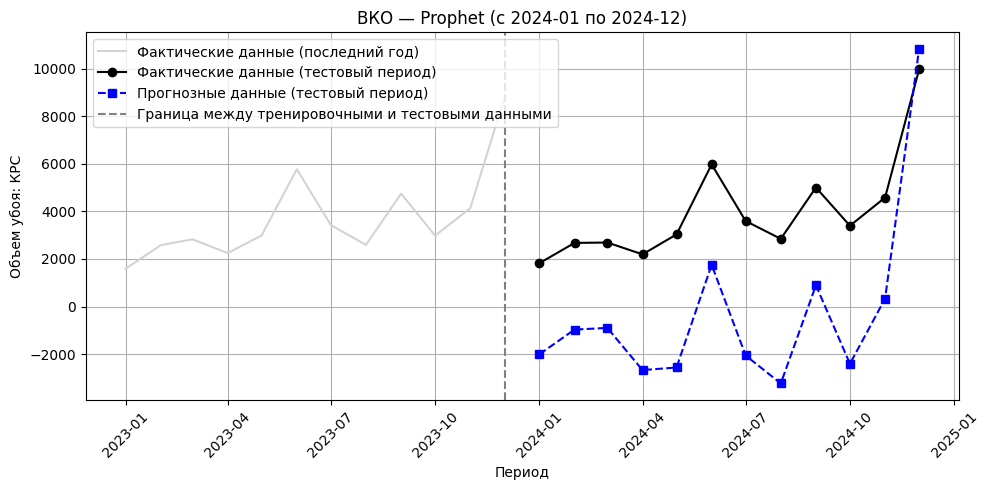

In [40]:
# Prepare data
df = df_vko.sort_values("–ü–µ—Ä–∏–æ–¥").dropna().copy()
df["–ü–µ—Ä–∏–æ–¥"] = pd.to_datetime(df["–ü–µ—Ä–∏–æ–¥"])
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"

# Define forecast horizons
horizons = [3, 6, 9, 12]
results = []

for horizon in horizons:
    print(f"\nüîπ –ü—Ä–æ–≥–Ω–æ–∑ –Ω–∞ {horizon} –º–µ—Å—è—Ü–µ–≤")

    # Define train/test split
    test_end = pd.to_datetime("2024-12")
    test_start = test_end - pd.DateOffset(months=horizon) + pd.DateOffset(days=1)

    train_df = df[df["–ü–µ—Ä–∏–æ–¥"] < test_start].copy()
    test_df = df[(df["–ü–µ—Ä–∏–æ–¥"] >= test_start) & (df["–ü–µ—Ä–∏–æ–¥"] <= test_end)].copy()

    # Prophet format
    prophet_train = train_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})
    prophet_test = test_df[["–ü–µ—Ä–∏–æ–¥", target]].rename(columns={"–ü–µ—Ä–∏–æ–¥": "ds", target: "y"})

    # Fit Prophet
    model = Prophet()
    model.fit(prophet_train)

    # Forecast
    future = model.make_future_dataframe(periods=horizon, freq="M")
    forecast = model.predict(future)

    # Extract matching forecasted months
    forecast_test = forecast[forecast["ds"].isin(prophet_test["ds"] - pd.DateOffset(days=1))].copy()
    y_pred = forecast_test["yhat"].values
    y_true = prophet_test["y"].values

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100

    results.append({
        "Test period": f"{(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} to {test_end.strftime('%Y-%m')}",
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })

    # Plot
    plt.figure(figsize=(10, 5))
    last_train = train_df[train_df["–ü–µ—Ä–∏–æ–¥"] >= (test_start - pd.DateOffset(months=12))]
    plt.plot(last_train["–ü–µ—Ä–∏–æ–¥"], last_train[target], color="lightgray", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (–ø–æ—Å–ª–µ–¥–Ω–∏–π –≥–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], test_df[target], marker="o", color="black", label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.plot(test_df["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", linestyle="--", color="blue", label="–ü—Ä–æ–≥–Ω–æ–∑–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ (—Ç–µ—Å—Ç–æ–≤—ã–π –ø–µ—Ä–∏–æ–¥)")
    plt.axvline(test_start, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –∏ —Ç–µ—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏")
    plt.title(f"–í–ö–û ‚Äî Prophet (—Å {(test_start + pd.DateOffset(months=1)).strftime('%Y-%m')} –ø–æ {test_end.strftime('%Y-%m')})")
    plt.xlabel("–ü–µ—Ä–∏–æ–¥")
    plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [41]:
# Summary table
results_df = pd.DataFrame(results)
avg_row = results_df[["RMSE", "MAE", "MAPE (%)"]].mean().to_dict()
avg_row["Horizon (months)"] = "–°—Ä–µ–¥–Ω–µ–µ"
results_df = pd.concat([results_df, pd.DataFrame([avg_row])], ignore_index=True)

print(results_df)

          Test period         RMSE          MAE    MAPE (%) Horizon (months)
0  2024-10 to 2024-12  2860.000392  2454.354327   42.187972              NaN
1  2024-07 to 2024-12  3042.756349  2858.773602   68.587340              NaN
2  2024-04 to 2024-12  3424.412487  3338.887499   94.257750              NaN
3  2024-01 to 2024-12  4577.794007  4371.264308  140.086729              NaN
4                 NaN  3476.240809  3255.819934   86.279948          –°—Ä–µ–¥–Ω–µ–µ


strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation